# Optimización

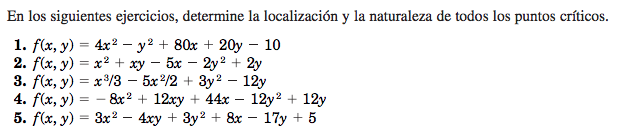

In [1]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [2]:
#Número1
var("x y")
f= 4*(x**2)- y**2 + 80*x + 20*y - 10

dfx= f.diff(x)
dfy= f.diff(y)

pc=solve([dfx,dfy],[x,y])
pc

In [3]:
dfxx= dfx.diff(x)
dfyy= dfy.diff(y)
dfxy= dfx.diff(y)
dfyx= dfy.diff(x)

D=dfxx*dfyy- dfxy
D.subs(pc),dfxx.subs(pc),

Es un punto silla

In [4]:
#Número2

f= x**2+ x*y- 5*x -2*(y**2)+ 2*y
dfx= f.diff(x)
dfy= f.diff(y)

pc=solve([dfx,dfy],[x,y])

dfxx= dfx.diff(x)
dfyy= dfy.diff(y)
dfxy= dfx.diff(y)
dfyx= dfy.diff(x)

D=dfxx*dfyy- dfxy
D.subs(pc),dfxx.subs(pc),

Es un punto silla

In [5]:
#Número3
var("x y f")

f=(x**3)/3- 5*(x**2)/2 + 3*(y**2)-12*y

nablaf=[f.diff(var)for var in [x,y]]

pcs=solve(nablaf)

H=hessian(f,[x,y])

for pc in pcs:
    eig=H.subs(pc).eigenvals()
    print("Punto crítico",pc," sus eigenvalores son:",eig)

Punto crítico {x: 0, y: 2}  sus eigenvalores son: {6: 1, -5: 1}
Punto crítico {x: 5, y: 2}  sus eigenvalores son: {6: 1, 5: 1}


El primer punto crítico es un punto silla.
El segundo punto crítico es un mínimo.

In [6]:
#Número4
f=-8*(x**2) +12*x*y +44*x - 12*(y**2)+12*y
dfx= f.diff(x)
dfy= f.diff(y)

pc=solve([dfx,dfy],[x,y])

dfxx= dfx.diff(x)
dfyy= dfy.diff(y)
dfxy= dfx.diff(y)
dfyx= dfy.diff(x)

D=dfxx*dfyy- dfxy
D.subs(pc),dfxx.subs(pc),

Es un máximo

In [7]:
#Número5
f= 3*(x**2)-4*x*y+ 3*(y**2)+8*x- 17*y +5
dfx= f.diff(x)
dfy= f.diff(y)

pc=solve([dfx,dfy],[x,y])

dfxx= dfx.diff(x)
dfyy= dfy.diff(y)
dfxy= dfx.diff(y)
dfyx= dfy.diff(x)

D=dfxx*dfyy- dfxy
D.subs(pc),dfxx.subs(pc),

Es un mínimo

6. Una compañía fabrica y venden dos modelos de lámpara L1 y L2. Para su fabricación se necesita un trabajo manual de 20 minutos para el modelo L1 y de 30 minutos para el L2; y un trabajo de máquina para L1 y de 10 minutos para L2. Se dispone para el trabajo manual de 100 horas al mes y para la máquina 80 horas al mes. Sabiendo que el beneficio por unidad es de 15 y 10 euros para L1 y L2, respectivamente, planificar la producción para obtener el máximo beneficio.

In [8]:
!pip install pulp

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from pulp import *

In [10]:
problema=LpProblem("Problema de fábrica de lámparas", LpMaximize)
x=LpVariable("Lámpara 1",0,None,LpInteger)
y=LpVariable("Lámpara 2",0,None,LpInteger)

problema+= 15*x + 10*y

problema+= (1/3)*x+(1/2)*y <= 100
problema+= (1/3)*x+(1/6)*y <= 80

problema.solve()
print(LpStatus[problema.status])

Optimal


In [11]:
for a in problema.variables():
    print(a.name,"=",a.varValue)

Lámpara_1 = 210.0
Lámpara_2 = 60.0


7. Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente. ¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

In [12]:
prob2=LpProblem("Problema de material escolar", LpMaximize)
a=LpVariable("Bloque 1",0,None,LpInteger)
b=LpVariable("Bloque 2",0,None,LpInteger)

prob2+= 6.5*a + 7*b

prob2+= 2*a+ 3*b <= 600
prob2+= a+b <= 500
prob2+= 2*a+ b <= 400

prob2.solve()
print(LpStatus[prob2.status])

Optimal


In [13]:
for i in prob2.variables():
    print(i.name,"=",i.varValue)

Bloque_1 = 150.0
Bloque_2 = 100.0


8. En una granja de pollos se da una dieta, para engordar, con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentra dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [14]:
prob3=LpProblem("Problema de pollos", LpMinimize)
X=LpVariable("X",0,None,LpInteger)
Y=LpVariable("Y",0,None,LpInteger)

prob3+= 10*X + 30*Y

prob3+= 1*X+ 5*Y >=15
prob3+= 5*X+ Y >=15

prob3.solve()
print(LpStatus[prob3.status])


Optimal


In [15]:
for e in prob3.variables():
    print(e.name,"=",e.varValue)

X = 5.0
Y = 2.0


9. Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €. ¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

In [16]:
prob4=LpProblem("Problema de fármacos", LpMaximize)
g=LpVariable("Pastilla grande",0,None,LpInteger)
p=LpVariable("Pastilla pequeña",0,None,LpInteger)

prob4+= 2*g + p
prob4+= 40*g+ 30*p <= 600
prob4+= g >= 3
prob4+= p >= 2*g

prob4.solve()
print(LpStatus[prob4.status])


Optimal


In [17]:
for d in prob4.variables():
    print(d.name,"=",d.varValue)

Pastilla_grande = 6.0
Pastilla_pequeña = 12.0


10. Una escuela prepara una excursión para 400 alumnos. La empresa de transporte tiene 8 autobuses de 40 plazas y 10 de 50 plazas, pero sólo dispone de 9 conductores. El alquiler de un autocar grande cuesta 800 € y el de uno pequeño 600 €. Calcular cuántos autobuses de cada tipo hay que utilizar para que la excursión resulte lo más económica posible para la escuela.

In [18]:
prob5=LpProblem("Problema de excursión", LpMinimize)
ag=LpVariable("Autobus grande",0,None,LpInteger)
ap=LpVariable("Autobus pequeña",0,None,LpInteger)

prob5+= 800*ag + 600*ap

prob5+= ag+ap <= 9
prob5+= 40*ap + 50*ag >= 400

prob5.solve()
print(LpStatus[prob5.status])

Optimal


In [19]:
for f in prob5.variables():
    print(f.name,"=",f.varValue)

Autobus_grande = 4.0
Autobus_pequeña = 5.0


11. Nota: El peso de una persona se puede adivinar, en parte, por su altura. Los siguientes datos muestran su descriptiva en 30 individuos (ejemplo simulado).


- Genera una grafica de la mejor curva que se ajuste a esos datos.
- ¿Cuál es el peso aproximado de una persona con una altura de 195 cm?

In [20]:
import numpy as np
np.random.seed(12345)
altura=np.random.normal(171,10,30)
peso=altura-100+ np.random.normal(0,10,30) 

In [21]:
var("x y")

In [22]:
from scipy.optimize import curve_fit
from scipy.stats import linregress
aprox=linregress(altura,peso)

In [23]:
x=float(input("Ingrese altura"))
y=aprox.intercept+aprox.slope*x
print("peso:",y)

Ingrese altura180
peso: 75.30260372198605


<IPython.core.display.Javascript object>


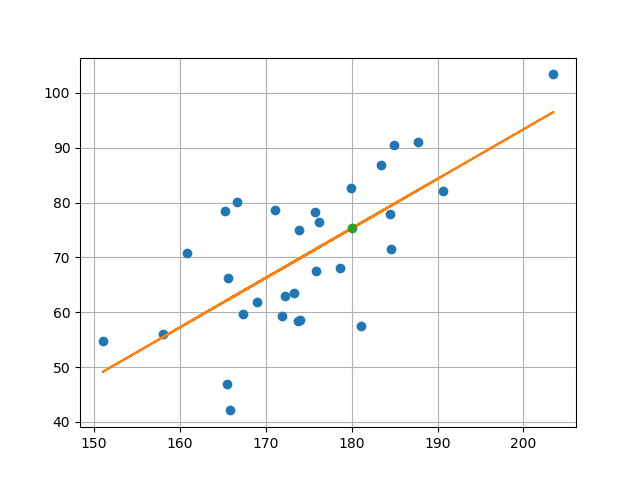

In [28]:
plt.plot(altura,peso,"o")
plt.plot(altura,aprox.intercept+aprox.slope*altura,"-")
plt.plot(x,y,"o")
plt.grid()
plt.show()

12. El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [29]:
!ls

Clase5.ipynb                       README.md
Clase7.ipynb                       Tarea_clase 4.ipynb
Clase7_LogisticRegressionMod.ipynb datasets
Clase_7.ipynb                      examen
ExamenMod.ipynb


In [30]:
import os
import pandas as pd

suscripcion = pd.read_csv(os.path.join("examen","suscripcion.csv"))
print(suscripcion.columns)

labels= suscripcion.y.values
features=suscripcion[["age","default","housing","loan","cons_price_idx","cons_conf_idx"]]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [31]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
features.head()

,age,default,housing,loan,cons_price_idx,cons_conf_idx
0,44,unknown,yes,no,93.444,-36.1
1,53,no,no,no,93.200,-42.0
2,28,no,yes,no,94.055,-39.8
3,39,no,no,no,93.075,-47.1
4,55,no,yes,no,92.201,-31.4


In [33]:
pd.get_dummies(features).head()

,age,cons_price_idx,cons_conf_idx,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,44,93.444,-36.1,0,1,0,0,0,1,1,0,0
1,53,93.200,-42.0,1,0,0,1,0,0,1,0,0
2,28,94.055,-39.8,1,0,0,0,0,1,1,0,0
3,39,93.075,-47.1,1,0,0,1,0,0,1,0,0
4,55,92.201,-31.4,1,0,0,0,0,1,1,0,0


In [35]:
features_dummies=pd.get_dummies(features,columns=["default","housing","loan"])
features_dummies.head(n=16)

,age,cons_price_idx,cons_conf_idx,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,44,93.444,-36.1,0,1,0,0,0,1,1,0,0
1,53,93.200,-42.0,1,0,0,1,0,0,1,0,0
2,28,94.055,-39.8,1,0,0,0,0,1,1,0,0
3,39,93.075,-47.1,1,0,0,1,0,0,1,0,0
4,55,92.201,-31.4,1,0,0,0,0,1,1,0,0
5,30,93.918,-42.7,1,0,0,0,0,1,1,0,0
6,37,92.893,-46.2,1,0,0,0,0,1,1,0,0
7,39,92.893,-46.2,1,0,0,0,0,1,1,0,0
8,36,92.963,-40.8,1,0,0,1,0,0,1,0,0
9,27,93.075,-47.1,1,0,0,0,0,1,1,0,0


In [37]:
data=features_dummies.values
data[0]

array([ 44.   ,  93.444, -36.1  ,   0.   ,   1.   ,   0.   ,   0.   ,
         0.   ,   1.   ,   1.   ,   0.   ,   0.   ])

In [38]:
import numpy as np

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

train_data,test_data,train_labels,test_labels=train_test_split(data,labels,random_state=0)
imp=Imputer()
imp.fit(train_data)
train_data_finite=imp.transform(train_data)
test_data_finite=imp.transform(test_data)

In [41]:
np.isnan(train_data_finite).any()

False

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(train_data_finite,train_labels)

In [46]:
print("Logistic regression score:%f"% lr.score(test_data_finite,test_labels))

Logistic regression score:0.889191


### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)